In [4]:
import re
import csv
import psutil
import matplotlib.pyplot as plt
import time
import numpy as np

In [9]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

<IPython.core.display.Javascript object>


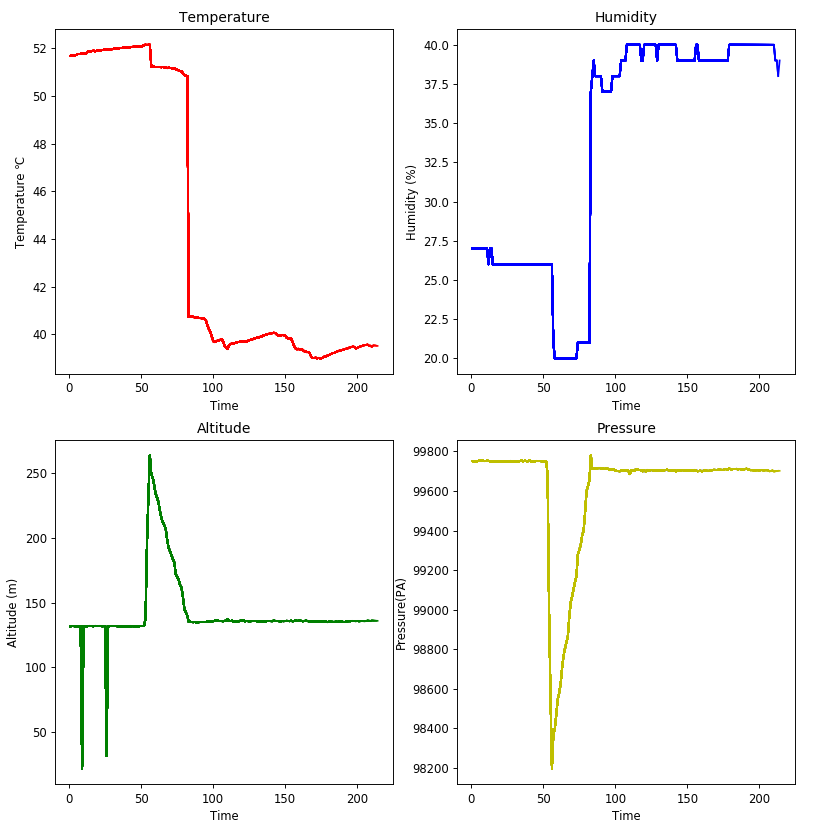

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9.8, 10))

axes[0, 0].set_title("Temperature")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Temperature ℃")

axes[0, 1].set_title("Humidity")
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Humidity (%)")

axes[1, 0].set_title("Altitude")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_ylabel("Altitude (m)")

axes[1, 1].set_title("Pressure")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_ylabel("Pressure(PA)")


#axes[0, 1].remove()

fig.tight_layout()
plt.show()

In [5]:
import serial

arduino2 = serial.Serial('COM3',115200) 
Temperature2 = []
Humidity2 = []
Altitude2 = []
Pressure2 = []
X = []
i = 1;
Cansat2 = ""

from OpenGL.GL import *
from OpenGL.GLU import *
import pygame
from pygame.locals import *
import serial
yaw_mode = False
video_flags = OPENGL|DOUBLEBUF
    
pygame.init()
screen = pygame.display.set_mode((640,480), video_flags)
pygame.display.set_caption("Press Esc to quit, z toggles yaw mode")
glViewport(0, 0, 640, 480)
glMatrixMode(GL_PROJECTION)
glLoadIdentity()
gluPerspective(45, 1.0*640/480, 0.1, 100.0)
glMatrixMode(GL_MODELVIEW)
glLoadIdentity()
glShadeModel(GL_SMOOTH)
glClearColor(0.0, 0.0, 0.0, 0.0)
glClearDepth(1.0)
glEnable(GL_DEPTH_TEST)
glDepthFunc(GL_LEQUAL)
glHint(GL_PERSPECTIVE_CORRECTION_HINT, GL_NICEST)
frames = 0
ticks = pygame.time.get_ticks()

SerialException: could not open port 'COM3': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)

In [6]:

while(1):
    try:
        s2 = str(arduino2.readline())
        s2 = s2.replace('b', '').replace('\\', '').replace('r','').replace('n','').replace('\'','')
        s2 = s2.replace(' ',',')
        data_file = open("data_file2.csv","a")
        data_file.write(s2)
        data_file.write("\n")
        data_file.close() 
        rawdata2  = re.split(',', s2)
        print(rawdata2)
        az=0
        try:
            lat2 = float(rawdata2[1])
            lon2 = float(rawdata2[2])
            temp2 = float(rawdata2[3])
            press2 = float(rawdata2[4])
            alti2 = float(rawdata2[5])
            humi2 = float(rawdata2[6])
            roll2 = float(rawdata2[7])
            pitch2 = float(rawdata2[8])
            
            
            if not((temp2<32) and (press2<80000) and (alti2 > 2000) and (humi2 > 70)):
                Temperature2.append(temp2)
                Pressure2.append(press2)
                Humidity2.append(humi2)
                Altitude2.append(alti2)
                X.append(i)
                i+=1 
                axes[0, 0].plot(X,Temperature2, color='r')
                axes[0, 1].plot(X,Humidity2, color='b')
                axes[1, 0].plot(X,Altitude2, color='g')
                axes[1, 1].plot(X,Pressure2, color='y')
                fig.canvas.draw()
                
            if (lat2>=10 and lat2<=16) and (lon2>=90 and lon2 <=111):
                Cansat2+=str(lon2)+","+str(lat2)+","+str(alti2)+" "
                
                with open ("position2.kml","w") as pos:
                    pos.write("""<?xml version="1.0" encoding="UTF-8"?>
            <kml xmlns="http://www.opengis.net/kml/2.2">
              <Document>
                <name>Paths</name>
                <description>Examples of paths. Note that the tessellate tag is by default
                  set to 0. If you want to create tessellated lines, they must be authored
                  (or edited) directly in KML.</description>

                <Style id="yellowLineGreenPoly">
                  <LineStyle>
                    <color>7f00ffff</color>
                    <width>4</width>
                  </LineStyle>
                  <PolyStyle>
                    <color>5014F00A</color>
                  </PolyStyle>
                </Style>

                <Style id="blueLineGreenPoly">
                  <LineStyle>
                    <color>50F00A14</color>
                    <width>4</width>
                  </LineStyle>
                  <PolyStyle>
                    <color>50F00A14</color>
                  </PolyStyle>
                </Style>

                <Placemark>
                  <name>Cansat2</name>
                  
                  <styleUrl>#blueLineGreenPoly</styleUrl>
                  <LineString>
                    <extrude>1</extrude>
                    <tessellate>1</tessellate>
                    <altitudeMode>absolute</altitudeMode>
                    <coordinates> %s
                    </coordinates>
                  </LineString>
                </Placemark>
              </Document>
            </kml>""" % (Cansat2))

            Cansat2+= " "
            time.sleep(0.5)

        except:
            continue
    except :
        arduino2 = serial.Serial('COM3',115200) 
        time.sleep(1)
        continue
    if (isinstance(pitch2, float)) and (isinstance(roll2, float)):
        event = pygame.event.poll()
        if event.type == QUIT or (event.type == KEYDOWN and event.key == K_ESCAPE):
            pygame.quit()  #* quit pygame properly
            break       
        if event.type == KEYDOWN and event.key == K_z:
            yaw_mode = not yaw_mode


        glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT);	

        glLoadIdentity()
        glTranslatef(0,0.0,-7.0)

        osd_text = "pitch: " + str("{0:.2f}".format(pitch2)) + ", roll: " + str("{0:.2f}".format(roll2))

        if yaw_mode:
            osd_line = osd_text + ", yaw: " + str("{0:.2f}".format(az))
        else:
            osd_line = osd_text

        position = (-2,-2, 2)
        font = pygame.font.SysFont ("Courier", 18, True)
        textSurface = font.render(osd_line, True, (255,255,255,255), (0,0,0,255))     
        textData = pygame.image.tostring(textSurface, "RGBA", True)     
        glRasterPos3d(*position)     
        glDrawPixels(textSurface.get_width(), textSurface.get_height(), GL_RGBA, GL_UNSIGNED_BYTE, textData)

        # the way I'm holding the IMU board, X and Y axis are switched 
        # with respect to the OpenGL coordinate system
        if yaw_mode:                             # experimental
            glRotatef(az, 0.0, 1.0, 0.0)  # Yaw,   rotate around y-axis
        else:
            glRotatef(0.0, 0.0, 1.0, 0.0)
        glRotatef(pitch2 ,1.0,0.0,0.0)        # Pitch, rotate around x-axis
        glRotatef(1*roll2 ,0.0,0.0,1.0)     # Roll,  rotate around z-axis

        glBegin(GL_QUADS)	
        glColor3f(0.0,1.0,0.0)
        glVertex3f( 1.0, 0.2,-1.0)
        glVertex3f(-1.0, 0.2,-1.0)		
        glVertex3f(-1.0, 0.2, 1.0)		
        glVertex3f( 1.0, 0.2, 1.0)		

        glColor3f(1.0,0.5,0.0)	
        glVertex3f( 1.0,-0.2, 1.0)
        glVertex3f(-1.0,-0.2, 1.0)		
        glVertex3f(-1.0,-0.2,-1.0)		
        glVertex3f( 1.0,-0.2,-1.0)		

        glColor3f(1.0,0.0,0.0)		
        glVertex3f( 1.0, 0.2, 1.0)
        glVertex3f(-1.0, 0.2, 1.0)		
        glVertex3f(-1.0,-0.2, 1.0)		
        glVertex3f( 1.0,-0.2, 1.0)		

        glColor3f(1.0,1.0,0.0)	
        glVertex3f( 1.0,-0.2,-1.0)
        glVertex3f(-1.0,-0.2,-1.0)
        glVertex3f(-1.0, 0.2,-1.0)		
        glVertex3f( 1.0, 0.2,-1.0)		

        glColor3f(0.0,0.0,1.0)	
        glVertex3f(-1.0, 0.2, 1.0)
        glVertex3f(-1.0, 0.2,-1.0)		
        glVertex3f(-1.0,-0.2,-1.0)		
        glVertex3f(-1.0,-0.2, 1.0)		

        glColor3f(1.0,0.0,1.0)	
        glVertex3f( 1.0, 0.2,-1.0)
        glVertex3f( 1.0, 0.2, 1.0)
        glVertex3f( 1.0,-0.2, 1.0)		
        glVertex3f( 1.0,-0.2,-1.0)		
        glEnd()	

        pygame.display.flip()
        frames = frames+1
    
print ("fps:  %d" % ((frames*1000)/(pygame.time.get_ticks()-ticks)))

SerialException: could not open port 'COM3': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)